In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:
mean = [[0, 0], [50, 40], [-10, 40]]
cov = [[[50, 20], [30, 40]], [[400, 500], [200, 400]], [[100, 20], [60, 40]]]
ms = 3

(-54.69220620432155,
 121.06952696084592,
 -53.640803584093284,
 128.0193632792602)

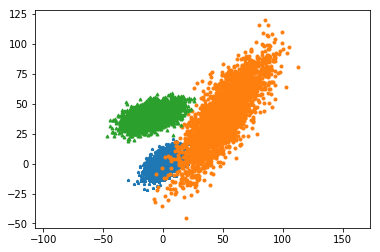

In [3]:
x0, y0 = np.random.multivariate_normal(mean[0], cov[0], 2500).T
x1, y1 = np.random.multivariate_normal(mean[1], cov[1], 3000).T
x2, y2 = np.random.multivariate_normal(mean[2], cov[2], 4500).T
plt.plot(x0, y0, '*', markersize = ms)
plt.plot(x1, y1, 'o', markersize = ms)
plt.plot(x2, y2, '^', markersize = ms)
plt.axis('equal')

In [4]:
X = np.c_[np.concatenate([x0, x1, x2]), np.concatenate([y0, y1, y2])]
Y = np.concatenate([[0 for i in xrange(len(x0))], [1 for i in xrange(len(x1))], [2 for i in xrange(len(x2))]])
num = len(X)
idx = np.arange(num)
np.random.shuffle(idx)
X = np.array([X[w] for w in idx])
Y = np.array([Y[w] for w in idx])
print X
print Y

[[ -6.94342773  41.01238086]
 [ 82.83821759  93.41429701]
 [ 75.87028727  67.5972408 ]
 ..., 
 [  7.50761426  32.75498089]
 [ -1.43055127  41.45215554]
 [ -8.40279239  37.66820004]]
[2 1 1 ..., 2 2 2]


(-54.69220620432155,
 121.06952696084592,
 -53.640803584093284,
 128.0193632792602)

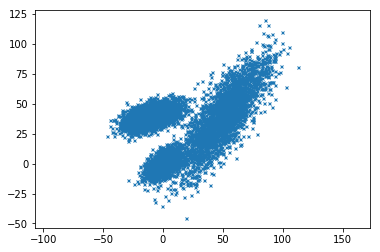

In [5]:
plt.plot(X[:,0], X[:,1], 'x', markersize = ms)
plt.axis('equal')

In [6]:
kernel = 3

In [7]:
def calc(x, m, v):
    return multivariate_normal.pdf(x, mean=m, cov=v)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=kernel, random_state=0).fit(X)

In [18]:
label = kmeans.labels_
p = np.array([ \
    len( filter(lambda x: label[x] == k, range(num)) ) / float(num) \
    for k in xrange(kernel) ])
mu = kmeans.cluster_centers_
si = [np.array([
        [10, 0 ],
        [0 , 10]
        ]) for k in xrange(kernel)]

In [20]:
for epoch in xrange(30):
    #    E step:
    #    --
    #    pp[i][j] : P(Y_j = k | X_j, \lambda_t) = p(Y_j = k) * Gaussian(X_j, \mu[k], \Sigma[k])
    #

    pp = np.array([[   p[k] * calc( X[j], mu[k], si[k] ) for j in xrange(num)  ] for k in xrange(kernel)])
    for j in xrange(num):
        temp = np.sum(pp[:,j])
        for k in xrange(kernel):
            pp[k][j] /= temp

    #    M step:
    #    --
    #    mu[i] : \mu[k]_{t+1} = \frac{ \sum_j_{P(Y_j=k | X_j,\lambda_t) * X[j] } }^{ \sum_j_{ P(Y_j = k | X_j, \lambda_t) } }

    mu = [  np.sum([ \
                pp[k][j] * X[j]
            for j in xrange(num) ], axis=0)
          / np.sum(pp[k]) \
        for k in xrange(kernel) ]
    
    si = [ np.sum( [ \
            pp[k][j] * np.mat(X[j] - mu[k]).T * np.mat(X[j]-mu[k]) \
                for j in xrange(num) ], axis=0) \
            / np.sum(pp[k]) \
        for k in xrange(kernel) ]
    
    p  = [ np.sum(pp[k]) / float(num)  for k in xrange(kernel) ]

    print "Epoch:", epoch
    print "-" * 30
    print p
    print
    print mu[0]
    print mu[1]
    print mu[2]
    print
    print si[0]
    print si[1]
    print si[2]
    print

Epoch: 0
------------------------------
[0.24814905892922234, 0.30192010926422919, 0.44993083180654841]

[ 0.01003597  0.05866587]
[ 49.70838326  39.57826332]
[ -9.99010412  39.94637199]

[[ 51.3230987   25.38009558]
 [ 25.38009558  39.1000278 ]]
[[ 324.5184957   346.37929804]
 [ 346.37929804  571.56847532]]
[[ 113.57690753   31.75411241]
 [  31.75411241   33.62854039]]

Epoch: 1
------------------------------
[0.24814905889177452, 0.30192010930347668, 0.4499308318047488]

[ 0.01003597  0.05866587]
[ 49.70838326  39.57826331]
[ -9.99010412  39.94637199]

[[ 51.32309868  25.38009557]
 [ 25.38009557  39.10002779]]
[[ 324.51849586  346.37929817]
 [ 346.37929817  571.56847542]]
[[ 113.57690753   31.75411241]
 [  31.75411241   33.62854039]]

Epoch: 2
------------------------------
[0.24814905887316827, 0.30192010932297714, 0.44993083180385457]

[ 0.01003597  0.05866587]
[ 49.70838326  39.57826331]
[ -9.99010412  39.94637199]

[[ 51.32309867  25.38009557]
 [ 25.38009557  39.10002779]]
[[ 324

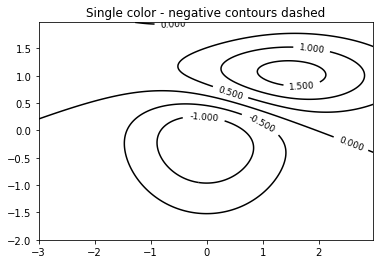

In [25]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')